In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

#print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [4]:
# Normalise the target data (this will make clearer training curves)

#targets
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [10]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [11]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,mae,val_loss,val_mae
0,1.005401,0.856472,0.718695,0.694270
1,0.902561,0.816689,0.557252,0.606939
2,0.690233,0.724798,0.398836,0.499929
3,0.524751,0.594514,0.462557,0.531997
4,0.526587,0.587330,0.601066,0.599422


In [12]:
df.tail()

,loss,mae,val_loss,val_mae
95,0.050197,0.174576,0.778006,0.613985
96,0.041891,0.153616,0.828277,0.647724
97,0.036857,0.139259,0.795030,0.613530
98,0.033916,0.139175,0.815971,0.632940
99,0.045725,0.166004,0.809016,0.642784


In [13]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.8839 - mae: 0.5864


[0.6856623199250963, 0.5863719]

In [14]:
# Evaluate the model on the test set

val_loss, val_mae = model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.8839 - mae: 0.5864


In [15]:
val_loss

0.6856623199250963

In [16]:
val_mae

0.5863719

#### Plot the learning curves

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

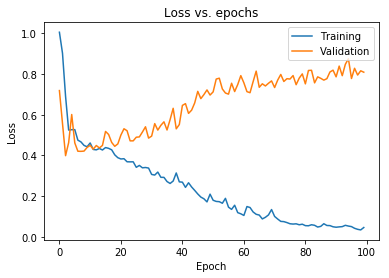

In [18]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [20]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [21]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [22]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [23]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [24]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6115 - mae: 0.5765


[0.5326576948165893, 0.57652694]

#### Plot the learning curves

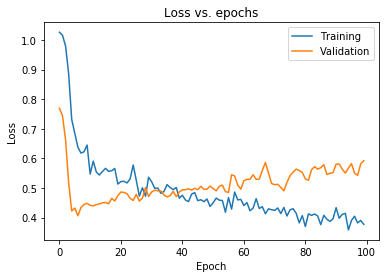

In [25]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [26]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print('Starting training ...')
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f'Starting epoch {epoch}')
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: Starting batch {batch}')
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'training: Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print(f'Finished training')

In [27]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [28]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

#### Train the model with the callback

In [29]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training ...
Starting epoch 0
Training: Starting batch 0
training: Finished batch 0
Training: Starting batch 1
training: Finished batch 1
Training: Starting batch 2
training: Finished batch 2
Training: Starting batch 3
training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
training: Finished batch 0
Training: Starting batch 1
training: Finished batch 1
Training: Starting batch 2
training: Finished batch 2
Training: Starting batch 3
training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
training: Finished batch 0
Training: Starting batch 1
training: Finished batch 1
Training: Starting batch 2
training: Finished batch 2
Training: Starting batch 3
training: Finished batch 3
Finished epoch 2
Finished training


In [30]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print('Starting testing ...')
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f'Testing: Starting batch {batch}')
        
    def on_test_batch_end(self, batch, logs=None):
        print(f'testing: Finished batch {batch}')
        
    def on_test_end(self, logs=None):
        print(f'Finished testing')

In [31]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing ...
Testing: Starting batch 0
testing: Finished batch 0
Testing: Starting batch 1
testing: Finished batch 1
Finished testing


1.061004540655348

In [32]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print('Starting prediction ...')
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f'Predict: Starting batch {batch}')
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f'Prediction: Finished batch {batch}')
        
    def on_predict_end(self, logs=None):
        print(f'Finished prediction')

In [33]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction ...
Predict: Starting batch 0
Prediction: Finished batch 0
Predict: Starting batch 1
Prediction: Finished batch 1
Finished prediction


array([[ 0.30666006],
       [ 0.02996774],
       [ 0.0503487 ],
       [ 0.10378467],
       [ 0.04143598],
       [ 0.12239506],
       [ 0.22065549],
       [ 0.32178319],
       [ 0.2267342 ],
       [ 0.19500507],
       [ 0.16525401],
       [ 0.18791097],
       [ 0.02352468],
       [ 0.16069835],
       [ 0.06000671],
       [ 0.19828857],
       [-0.00122824],
       [ 0.21957757],
       [ 0.14299634],
       [ 0.2070792 ],
       [ 0.02281225],
       [ 0.07900529],
       [ 0.12580642],
       [-0.00609393],
       [ 0.00627598],
       [ 0.00818571],
       [ 0.13452585],
       [-0.00123647],
       [ 0.0124245 ],
       [ 0.03681101],
       [ 0.00200966],
       [ 0.2418456 ],
       [ 0.09491258],
       [ 0.24856733],
       [ 0.11542141],
       [ 0.29743543],
       [ 0.06891289],
       [ 0.06824075],
       [-0.00090686],
       [-0.00327135],
       [ 0.18422551],
       [ 0.00960247],
       [ 0.03584121],
       [ 0.08559368],
       [ 0.07157678]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()